## Preprocessing of label

In [4]:
import pandas as pd
import numpy as np

In [125]:
# submission = pd.read_csv('datasolve-us/sample_submission.csv')
train = pd.read_csv('datasolve-us/train.csv')
# test = pd.read_csv('datasolve-us/test.csv')

label = np.unique(train.cat_name)

train['label_idx'] = train.cat_name.apply(lambda x: [np.where(label==x)[0].item()])
train = train.drop('cat_name', axis=1)

train = train.groupby(['id', 'name', 'document_text']).sum().reset_index()

In [144]:
train['label'] = None
train['label'] = train['label'].apply(lambda x: np.zeros(50))
for i in range(len(train)):
    train.iloc[i, -1][train['label_idx'][i]] = 1

In [146]:
# train.to_pickle('Preprocessing_Train.pkl')

In [147]:
train

,id,name,document_text,label_idx,label
0,4772,Consent Order in the Matter of Solium Financia...,"Solium Financial Services LLC (""SFS"") is a bro...","[25, 10, 24, 22, 23, 5, 3]","[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
1,4774,Alberta Securities Commission Warns Investors ...,A new year brings new investment opportunities...,"[29, 38, 18, 16]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,4775,Exempt Market Dealer Agrees to Settlement,The Alberta Securities Commission (ASC) has co...,"[47, 49, 25, 46, 3, 22, 5, 13]","[0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
3,4776,Canadian Securities Regulators Announces Consu...,The Canadian Securities Administrators (CSA) p...,"[47, 40, 22, 39, 11]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,4778,CSA Consultation Paper 51-405 Consideration of...,"On April 6, 2017, the Canadian Securities Admi...","[6, 39, 11, 47, 40]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
...,...,...,...,...,...
9854,57201,What To Do If Youre Having Difficulty Repaying...,Having a good track record when it comes to me...,"[16, 6]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
9855,57207,The Bank of Russia Restricted Exchange Trading...,"The Bank of Russia has decided, starting from ...","[34, 47, 43, 13, 49, 29, 44, 46, 6]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."
9856,57234,Application of a Pecuniary Administrative Sanc...,Consob published application of a pecuniary ad...,"[12, 39, 0, 38, 15]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
9857,57240,Investor Consultation - Investor Service Hotli...,"On May 31, 2022, Shenzhen Stock Exchange publi...","[44, 8]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, ..."


In [159]:
# pd.DataFrame(list(enumerate(label)), columns=['label_idx', 'cat_name']).to_csv('Label_ID.csv')

## Preprocessing of text

In [2]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import re
import pandas as pd
import numpy as np
import string
import time

In [3]:
## 建立 tokenize 步骤
train = pd.read_pickle('Preprocessing_Train.pkl')

stop_words = stopwords.words('english')
non_neg_stop = [i for i in stop_words if "n't" not in i and "no" not in i]
lemma = WordNetLemmatizer()


def pos(x):
    if x.startswith('J'):
        return 'a'
    elif x.startswith('V'):
        return 'v'
    elif x.startswith('R'):
        return 'r'
    else:
        return 'n'
    
    
def tok(doc, non_neg=False, lemmatized=False):
    
    if non_neg:
        stop = non_neg_stop
    else:
        stop = stop_words
       
    tokens = re.split(r'\s', doc.lower())
    
    if lemmatized:
        pos_list = nltk.pos_tag(tokens)
        tokens = list(map(lambda x: lemma.lemmatize(x[0], pos(x[1])), pos_list))    

    tokens = [i for i in tokens if i not in stop]
    tokens = [i for i in tokens if len(re.findall(r'\w', i)) >= 2]
    tokens = [re.findall(r"\w[a-zA-Z0-9.-]*\w", i)[0] for i in tokens if re.findall(r"\w[a-zA-Z0-9.-]*\w", i)]
    
    return tokens


In [10]:
train[['id','name']]

,id,name
0,4772,Consent Order in the Matter of Solium Financia...
1,4774,Alberta Securities Commission Warns Investors ...
2,4775,Exempt Market Dealer Agrees to Settlement
3,4776,Canadian Securities Regulators Announces Consu...
4,4778,CSA Consultation Paper 51-405 Consideration of...
...,...,...
9854,57201,What To Do If Youre Having Difficulty Repaying...
9855,57207,The Bank of Russia Restricted Exchange Trading...
9856,57234,Application of a Pecuniary Administrative Sanc...
9857,57240,Investor Consultation - Investor Service Hotli...


## TFIDF extraction

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [4]:
## 分训练测试集
X_train, X_test, y_train, y_test = train_test_split(train.document_text, train.label, test_size=0.25)

In [213]:
def get_voc(non_neg=True, lemmatized=True):
    
    voc = []
    for i in X_train:
        tokens = tok(i, non_neg, lemmatized)
        voc += tokens
        
    voc = list(set(voc))
    
    return voc

In [118]:
## 自定义词汇库以兼容此前的 token 化
voc = get_voc()
tfidf = TfidfVectorizer(min_df=10, vocabulary=voc)

In [122]:
vec_train = tfidf.fit_transform(X_train)
vec_test = tfidf.transform(X_test)

## Model Construction for TFIDF

In [157]:
import torch
import torch.nn
from torch.utils.data import DataLoader, random_split, Dataset
from matplotlib import pyplot as plt

In [104]:
tfidf = TfidfVectorizer(min_df=10, vocabulary=get_voc())
vec_train = tfidf.fit_transform(X_train)
vec_test = tfidf.transform(X_test)

In [115]:
class _dataset(Dataset):
    
    def __init__(self, X, y):
        super(_dataset, self).__init__()
        self.X = torch.Tensor(X)
        self.y = torch.Tensor(y)
        
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
    def __len__(self):
        return len(self.X)
    
    
_train = _dataset(vec_train.toarray(), list(y_train))
_test = _dataset(vec_test.toarray(), list(y_test))

In [155]:
class MLP_model(nn.Module):
    
    def __init__(self):

        super(MLP_model, self).__init__()
        
        self.net = nn.Sequential(
            nn.Linear(vec_train.shape[1], 500),
            nn.ReLU(),
            nn.Linear(500, 200),
            nn.ReLU(),
            nn.Linear(200, 50),
            nn.Sigmoid())

            
    def forward(self, x):
        return self.net(x)

In [153]:
def train_model(model, train_dataset, eval_dataset, device, 
                lr=0.0005, epochs=50, batch_size=256):
    
    history = {'train_loss': [], 'eval_loss': []}
    
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    eval_loader = DataLoader(eval_dataset, batch_size=batch_size)

    model = model.to(device)
    Loss = nn.BCELoss().to(device)
    op = torch.optim.Adam(model.parameters(), lr=lr)
    
    print('Training start!')
    start = time.time()
    
    for epoch in range(epochs):
        
        model.train()
        train_loss = 0
        eval_loss = 0
        
        for X, y in train_loader:
            X = X.to(device)
            y = y.to(device)
            out = model(X)
            loss = Loss(out, y)
            
            op.zero_grad()
            loss.backward()
            op.step()
            
            train_loss += loss
            
        model.eval()
        with torch.no_grad():
            for X, y in eval_loader:
                X = X.to(device)
                y = y.to(device)
                out = model(X)
                loss = Loss(out, y)
                eval_loss += loss
                
        train_loss = (train_loss/len(train_loader)).item()
        eval_loss = (eval_loss/len(eval_loader)).item() 
        
        history['train_loss'].append(train_loss)
        history['eval_loss'].append(eval_loss)  
        
    print('Training complete!')
    print(f'Spent time: {time.time()-start} seconds')
    
    return history

In [156]:
model_A = MLP_model()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
epochs = 50
lr = (np.e)*10**-4
batch_size = round((np.e)*50)
hist_A = train_model(model_A, _train, _test, device, 
                lr=lr, epochs=epochs, batch_size=batch_size)

Training start!
Training complete!
Spent time: 52.396262884140015 seconds


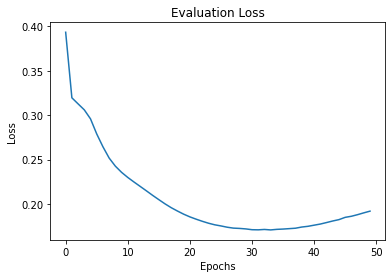

In [161]:
plt.title('Evaluation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist_A['eval_loss']);

In [178]:
with torch.no_grad():
    test = torch.Tensor(vec_test.toarray()).to(device)
    res = model_A(test)
    res = res.cpu()

target = []
for i in y_test.apply(list):
    target += i

acc = (torch.Tensor(target) == np.round(res).view(-1)).float().mean().item()
print(acc)

from sklearn.metrics import classification_report
print(classification_report(target, np.round(res).view(-1)))

## Co-currence of Y

In [6]:
y_train

6907    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
5743    [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3732    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ...
7675    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
9497    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
                              ...                        
6470    [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
7361    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
6194    [1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1221    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1814    [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, ...
Name: label, Length: 7394, dtype: object

In [7]:
label = pd.read_csv('Label_ID.csv')

label = label.iloc[:,1:]

In [19]:
y_try = train.label_idx[y_train.index]

In [20]:
y_try

6907                                             [24, 13]
5743                   [33, 30, 2, 12, 21, 29, 26, 31, 0]
3732                   [6, 1, 45, 18, 16, 46, 23, 12, 38]
7675                                  [0, 38, 39, 15, 12]
9497                                         [34, 43, 42]
                              ...                        
6470                                          [29, 0, 33]
7361                         [14, 48, 42, 20, 36, 39, 29]
6194                       [0, 14, 2, 42, 29, 33, 15, 26]
1221                                         [29, 45, 42]
1814    [5, 29, 8, 43, 44, 49, 36, 34, 13, 11, 47, 7, 46]
Name: label_idx, Length: 7394, dtype: object

In [21]:
dic = {i: [] for i in range(50)}

for i in range(50):
    for j in y_try:
        if i in j:
            temp = j[:]
            temp.remove(i)
            dic[i].append(temp)

In [69]:
save = {}
for n in range(50):
    for i in dic:
        for j in dic[i]:
            if n in j:
                if f"{n}|{i}" not in save:
                    save[f"{n}|{i}"] = 1
                else:
                    save[f"{n}|{i}"] += 1
                    

base = [len(dic[i]) for i in dic]

for i in save:
    save[i] = save[i]/base[int(re.findall(r"[|](\d*)", i)[0])]

In [92]:
ky = val = np.array([i for i in save])
val = np.array([save[i] for i in save])

print(list(zip(ky[val.argsort()[::-1]][:20], val[val.argsort()[::-1]][:20])))

[('0|15', 0.8364116094986808), ('47|49', 0.7837837837837838), ('16|32', 0.7440633245382586), ('43|34', 0.6956521739130435), ('34|43', 0.6867749419953596), ('49|47', 0.666156202143951), ('16|18', 0.6652046783625731), ('29|42', 0.6241610738255033), ('38|23', 0.5964035964035964), ('34|49', 0.5963963963963964), ('1|28', 0.5948905109489051), ('43|49', 0.581981981981982), ('39|15', 0.5804749340369393), ('24|25', 0.5579514824797843), ('34|47', 0.5436447166921899), ('25|24', 0.5425950196592398), ('20|40', 0.5382978723404256), ('43|11', 0.5323624595469255), ('48|36', 0.5308370044052864), ('29|26', 0.5279187817258884)]


## Word Embedding

In [287]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split, Dataset
from matplotlib import pyplot as plt

In [292]:
def get_voc_new(X, non_neg=True, lemmatized=True):
    
    voc = []
    token_list = []
    for i in X:
        tokens = tok(i, non_neg, lemmatized)
        token_list.append(tokens)
        voc += tokens
        
    voc = list(set(voc))
    
    return voc, token_list

In [216]:
voc, tk_list = get_voc_new(X_train, False, True)
voc_test, tk_list_test = get_voc_new(X_test, False, True)
voc_dic = {item: idx+1 for idx, item in enumerate(voc)}

In [311]:
def word2idx(token_list):
    
    token_idx = []
    for sent in token_list:
        sent_list = []
        for token in sent:
            if token in voc_dic:
                idx = voc_dic[token]
            else:
                idx = 0
            sent_list.append(idx)
        token_idx.append(sent_list)

    return token_idx

In [312]:
tk_idx_test = word2idx(tk_list_test)

tk_idx = word2idx(tk_list)

In [ ]:
class dataset_(Dataset):
    
    def __init__(self, X, y, max_len=1024):
        super(dataset_, self).__init__()
        pad = [i[:max_len] + [0]*(max_len-len(i[:max_len])) for i in X]
        self.X = torch.tensor(pad, dtype=torch.int32)
        self.y = torch.Tensor(list(y))
        
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
    def __len__(self):
        return len(self.X)
    
    
train_ = dataset_(tk_idx, y_train)
test_ = dataset_(tk_idx_test, y_test)

In [286]:
nn.Embedding(len(voc_dic)+1, 256, 0)

Embedding(43787, 256, padding_idx=0)